# ITAI 1371: Introduction to Machine Learning - Midterm Project##

Data Storytelling: An End-to-End ML Investigation

**Due Date:** One week from today  
**Time Allotment:** Approx. 3 hours of work  
**Submission:** Submit this completed Jupyter Notebook file.---

### Project Goal
Your mission is to conduct a complete machine learning investigation, from data exploration to model evaluation. More than just writing code, you will be a **data storyteller**.

Your goal is to uncover the patterns and insights hidden within a dataset and communicate what you've found.

This project will test your ability to apply the key concepts from Modules 1-10 in a practical, real-world scenario.

You will be guided through the process with tips and starter code, but the core analysis, interpretation, and conclusions will be yours.

### Academic Integrity & Use of AI Tools-

This is an **open-book, open-note** midterm. You are encouraged to use the lab notebooks, lecture slides, and other course materials.- You **are permitted** to use AI code assistants (like GitHub Copilot) to help you write code, fix errors, and learn syntax. This is a valuable real-world skill.-

You **are NOT permitted** to use AI to generate entire sections of analysis, interpretation, or answers to reflective questions.

The goal is for *you* to demonstrate understanding.

**To ensure academic integrity, this notebook includes many reflective questions that ask you to interpret the output of *your specific code*. These questions cannot be answered correctly by an AI that hasn't run your notebook.

**---### Grading Rubric (100 Points Total)

| Section | Task | Points || :--- | :--- | :--- ||

**Part 1: Data Loading** | Successfully load your chosen dataset. | 5 ||

**Part 2: EDA** | Create and interpret at least two relevant visualizations. | 20 || | Write a clear interpretation of the story your plots tell. | ||

**Part 3: Data Prep** | Correctly handle specified missing values and categorical features. | 15 || | Justify your choices in the markdown cells. | ||

**Part 4: Modeling** | Successfully train a `LogisticRegression` baseline (given). | 15 || | Successfully train a second model of your choice. | ||

**Part 5: Evaluation** | Calculate and compare accuracy for both models. | 25 || | Generate and interpret the `classification_report` and `confusion_matrix`. | || | Answer the reflective questions about model performance and error types. | ||

**Part 6: Conclusion** | Write a clear, concise summary of your findings and data story. | 15 || | Address the key questions in the conclusion prompt. | ||

**Overall** | Code is clean, commented, and runs without errors. All markdown cells are filled out. | 5 |

## Part 1: Choose Your Dataset (5 Points)

For this project, you can choose one of the following two classic datasets. Both are classification problems.

1.  **Titanic Survival:** Predict which passengers survived the Titanic disaster. (You are familiar with this from our lab).

2.  **Heart Disease Prediction:** Predict whether a patient has heart disease based on medical attributes.

**Instructions:**

1.  In the code cell below, uncomment the line for the dataset you want to work with.

2.  Run the cell to load the data into a pandas DataFrame called `df`.

3.  Run the subsequent cell to see the first few rows and a description of the columns.

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()



#Display settings
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', 1000)         # widen the display
# --- CHOOSE YOUR DATASET ---
# Uncomment one of the two lines below to select your dataset

# Option 1: Titanic Dataset
dataset_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'
# This is the old link https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
# This is tne new link https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
# This is the new link that works https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv

# Option 2: Heart Disease Dataset
# dataset_url = 'https://raw.githubusercontent.com/plotly/datasets/master/heart.csv'

# --- LOAD THE DATA ---
# This code will load the dataset from the URL you selected above
try:
    df = pd.read_csv(dataset_url)
    print(f"Successfully loaded dataset from: {dataset_url}")
    print(f"Dataset shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please make sure you have selected a valid URL.")

Successfully loaded dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv
Dataset shape: (891, 12)


### Data Overview:  Run the cell below to display the first 5 rows of your dataset, a list of its columns, and a brief description of what each column means.

In [ ]:
#Display settings
pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', 1000)         # widen the display

# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
print(df.head())

# Display column info and descriptions
print("--- Column Descriptions ---")
if 'PassengerId' in df.columns:

  # Titanic Dataset
  print("You are using the Titanic Dataset.")
  print("Target Variable: 'Survived' (0 = No, 1 = Yes)")

  # ... (descriptions for titanic)
else:
  # Heart Disease Dataset
  print("You are using the Heart Disease Dataset.")
  print("Target Variable: 'target' (0 = No Heart Disease, 1 = Has Heart Disease)")

  # ... (descriptions for heart disease)

  # A helper to rename columns for the heart disease dataset for clarity
  if 'cp' in df.columns:
    df = df.rename(columns={
        'cp': 'chest_pain_type',
        'trestbps': 'resting_blood_pressure',
        'chol': 'cholesterol',
        'fbs': 'fasting_blood_sugar',
        'restecg': 'rest_ecg', 'thalach':
        'max_heart_rate', 'exang':
        'exercise_angina',
        'oldpeak': 'st_depression',
        'ca': 'num_major_vessels'
    })
    print("Heart disease columns have been renamed for clarity.")

  #Display datafram info
  print("--- Data Info ---")
  df.info()
#row of data
num_rows = df.shape[0]
print(f"Total number of rows: {num_rows}")
gender_counts = df['Sex'].value_counts()
print("Gender Distribution:")
print(gender_counts)


--- First 5 Rows ---
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S
--- Column Descriptions ---
You are using the Titanic D

## Part 2: Exploratory Data Analysis (EDA) & Storytelling (20 Points)

Now, it's time to be a data detective. Before you can model the data, you must understand it. What secrets does it hold?

**Your Task:**
1.  **Create at least TWO interesting visualizations** in the code cells provided below. You can create more if you like.    
*   Use libraries like `matplotlib` or `seaborn`.    
*   Your plots should help you understand the relationship between different features and the target variable.    
*   **Tip:** Think about the questions we asked during the Titanic lab (e.g., "How does survival rate differ by gender?" or "What is the age distribution of survivors?"). Ask similar questions of your dataset.

2.  **Interpret your visualizations** in the markdown cell provided. Explain what you see and what story your plots are starting to tell.

Survival rate by gender was extreme.  It is clear that women (and children!) survived at rates better than men overall. This holds true even when the class of travel further segments the data. Breaking down even further, when you look at each gender by class women still had better survival rates than men.  The women in 3rd class had a higher probability than men of surviving, but clearly, Third class women did not have as high of survival rates as first and second class.

The men in all classes did not survive as much as they died. In third class, there is an extreme value of the number of men that died versus those that survived. Clearly, being a man in third class had a lower probablility of surviving.

### Visualization 1
**Instructions:**

Create your first plot in the cell below.

Make sure to give it a title and label your axes!

Good plots are easy to read.

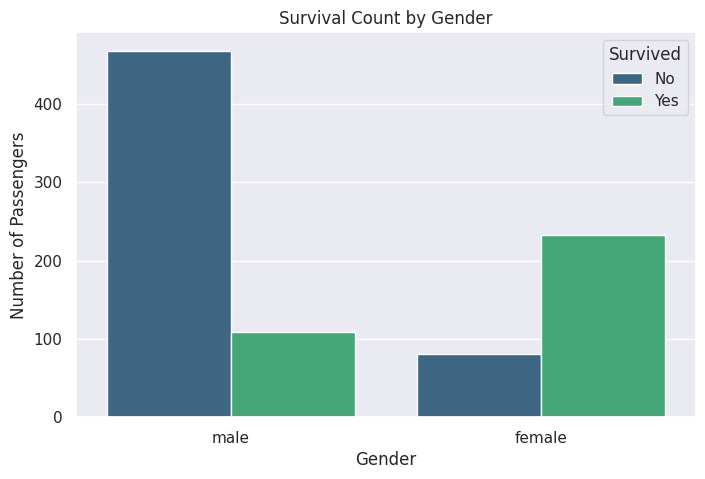

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


# --- ENTER YOUR CODE HERE for Visualization 1 ---

# plot #1 Survival Count by Gender

plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='viridis')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# --- END OF YOUR CODE ---

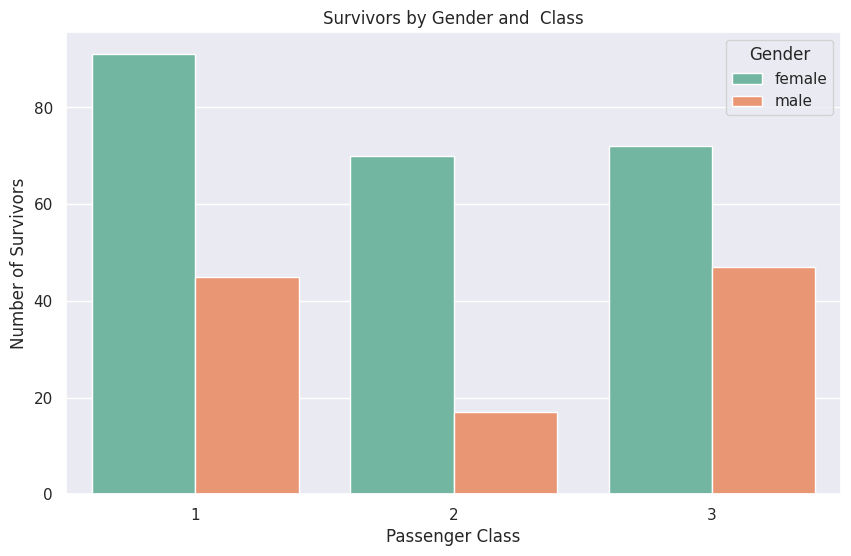

In [ ]:
# Plot #1 Survivivors by Gender and Passenger Class
plt.figure(figsize=(10,6))
sns.countplot(x='Pclass', hue='Sex', data=df[df['Survived'] ==1], palette='Set2')
plt.title('Survivors by Gender and  Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Gender')
plt.show()

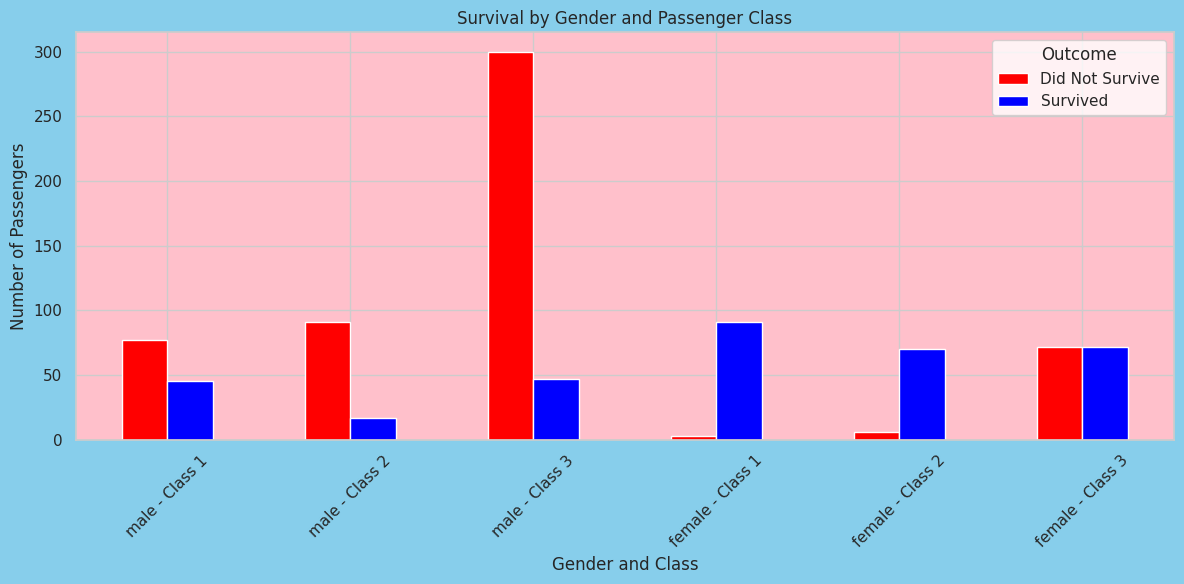

In [ ]:
# Plot #3  count of Gender, Pclass and Survival
sns.set(style='whitegrid')

# Prepare Groued grouped data
grouped = df.groupby(['Sex', 'Pclass', 'Survived']).size().reset_index(name='Count')


# Create a combined label for each group
grouped['Group'] = grouped['Sex'] + ' - Class ' + grouped['Pclass'].astype(str)

# Pivot to get survivors and non-survivors side by side
pivot = grouped.pivot(index='Group', columns='Survived', values='Count').fillna(0)
pivot.columns = [ 'Did Not Survive', 'Survived'] # 0 = died, 1 = survived
pivot = pivot.reindex([
    'male - Class 1', 'male - Class 2', 'male - Class 3',
    'female - Class 1', 'female - Class 2', 'female - Class 3'
])


#Plotting #3 bar chart
sns.set(style='whitegrid') # Keep the grid style
fig, ax = plt.subplots(figsize=(12,6))

pivot.plot(kind='bar', color=['red', 'blue'], ax=ax)


# Set background color to pink and skyblue for graph plotting fun and experience
ax.set_facecolor('pink')  # background inside the axis
plt.gcf().set_facecolor('skyblue') #background outside the axis


# Add labels and title
plt.title('Survival by Gender and Passenger Class')
plt.xlabel('Gender and Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Outcome')
plt.xticks(rotation=45)
plt.tight_layout()

#Show Plot
plt.show()

### Visualization 2

**Instructions:**

Create your second plot in the cell below.

Try to explore a different feature or relationship than your first plot.

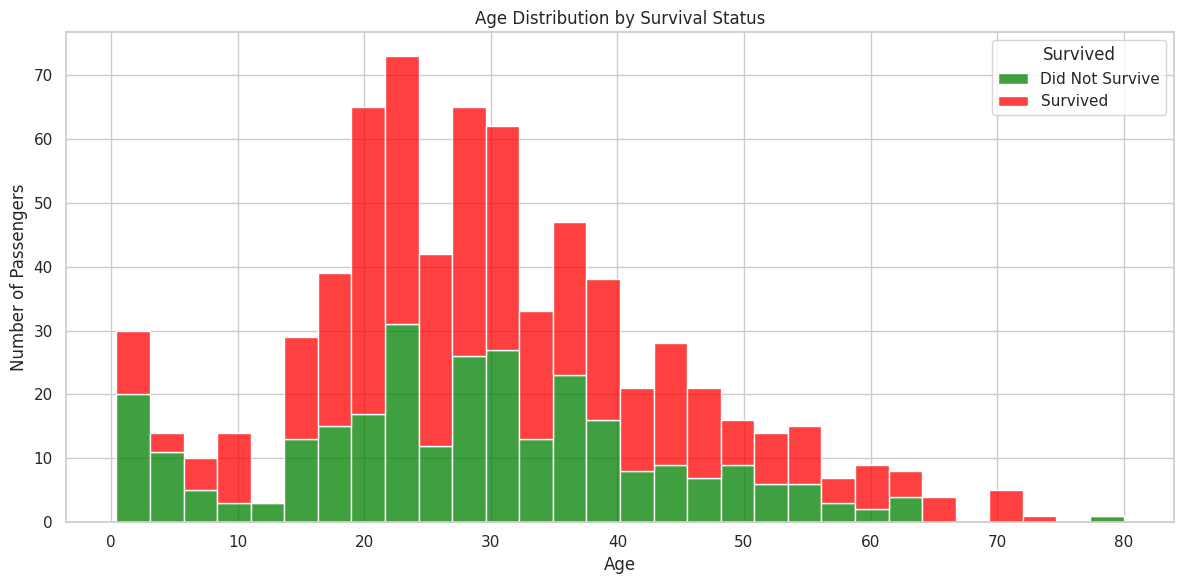

In [ ]:
# --- ENTER YOUR CODE HERE ---
# Create your first visualization. Some ideas:
# - A countplot to see the distribution of the target variable.
# - A barplot to compare a feature against the target (e.g., 'sex' vs 'survived').
# - A histogram or KDE plot to see the distribution of a numerical feature (e.g., 'age').plt.figure(figsize=(10, 6))
# Example: sns.countplot(x='your_feature', data=df)
# --- END OF YOUR CODE ---
# plt.show()

# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


# --- ENTER YOUR CODE HERE for Visualization 1 ---

# Set Style
sns.set(style='whitegrid')

# Plot histogram of age by gender and survival
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', palette={0: 'red', 1: 'green'}, bins=30)

# Add labels and title
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])

plt.tight_layout()

#Show Plot
plt.show()








/tmp/ipython-input-4109162163.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()


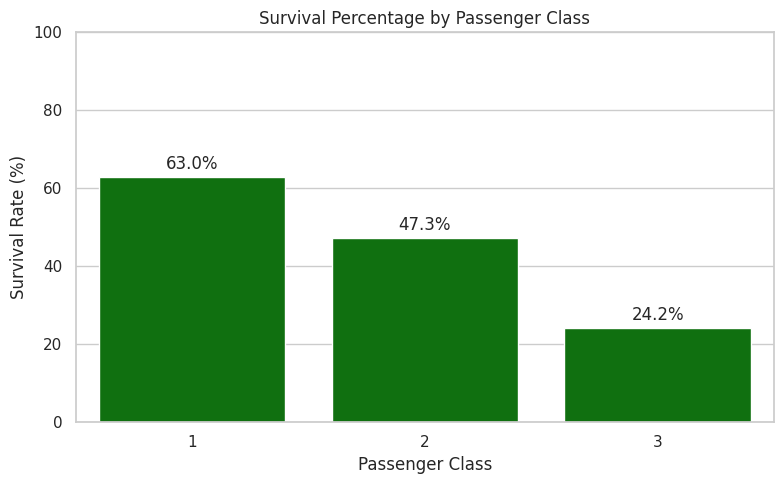

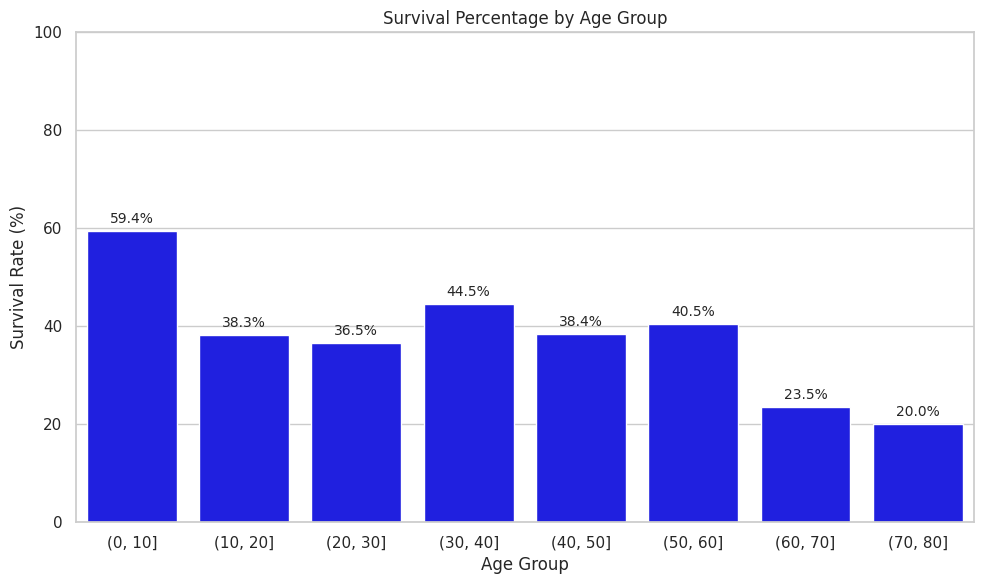

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Calculate survival percentage by class
survival_rate = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_rate['Survived'] = survival_rate['Survived'] * 100  #converting to percentage

# Plot bar chart
plt.figure(figsize=(8,5))
ax = sns.barplot(x='Pclass', y='Survived', data=survival_rate, color='green')

# Add percentage labels on top of each bar
for i, row in survival_rate.iterrows():
  ax.text(i, row['Survived'] + 1, f"{row['Survived']:.1f}%", ha='center', va='bottom', fontsize=12)

#Add labels and title
plt.title('Survival Percentage by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)

plt.tight_layout()



# --- Survival percentage by Age Groups ---
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Calculate survival percentage by age group
survival_rate_age = df.groupby('AgeGroup')['Survived'].mean().reset_index()
survival_rate_age['Survived'] = survival_rate_age['Survived'] * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x='AgeGroup', y='Survived', data=survival_rate_age, color='blue')

# Add percentage labels
for i, row in survival_rate_age.iterrows():
    ax.text(i, row['Survived'] + 1, f"{row['Survived']:.1f}%",
            ha='center', va='bottom', fontsize=10)

plt.title('Survival Percentage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.tight_layout()





/tmp/ipython-input-3005117168.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['AgeGroup', 'Sex'])['Survived']


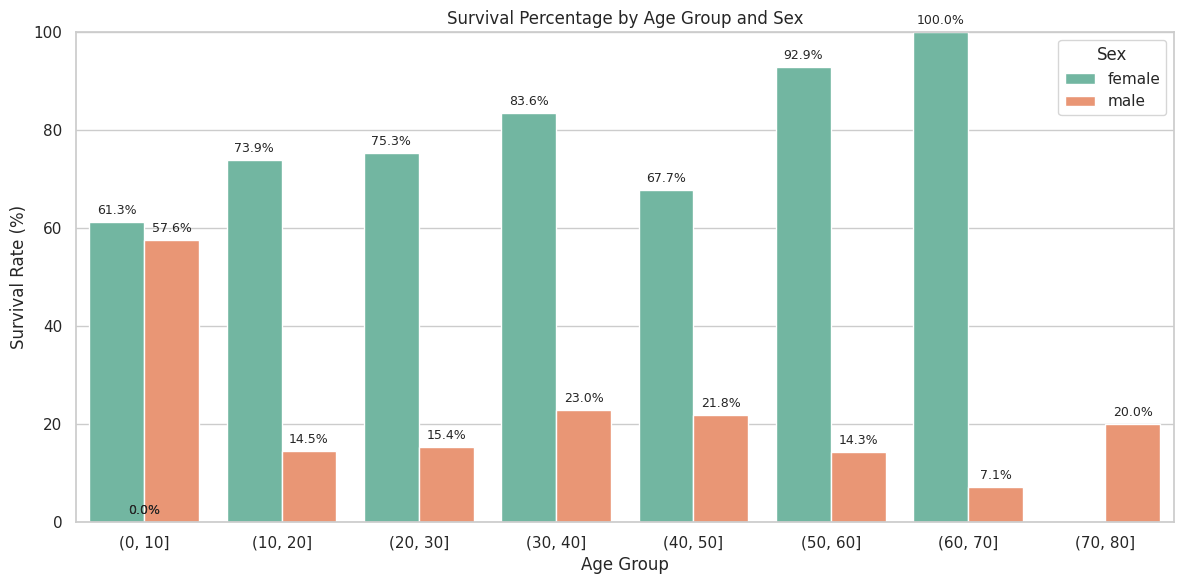

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Calculate survival percentage by AgeGroup and Sex
survival_rate_age_sex = (
    df.groupby(['AgeGroup', 'Sex'])['Survived']
      .mean()
      .reset_index()
)
survival_rate_age_sex['Survived'] = survival_rate_age_sex['Survived'] * 100

# Plot grouped bar chart
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='AgeGroup',
    y='Survived',
    hue='Sex',
    data=survival_rate_age_sex,
    palette='Set2'
)

# Add percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 1,
        f'{height:.1f}%',
        ha='center', va='bottom', fontsize=9
    )

# Labels and title
plt.title('Survival Percentage by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1878605590.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Pclass', 'AgeGroup', 'Sex'])['Survived']


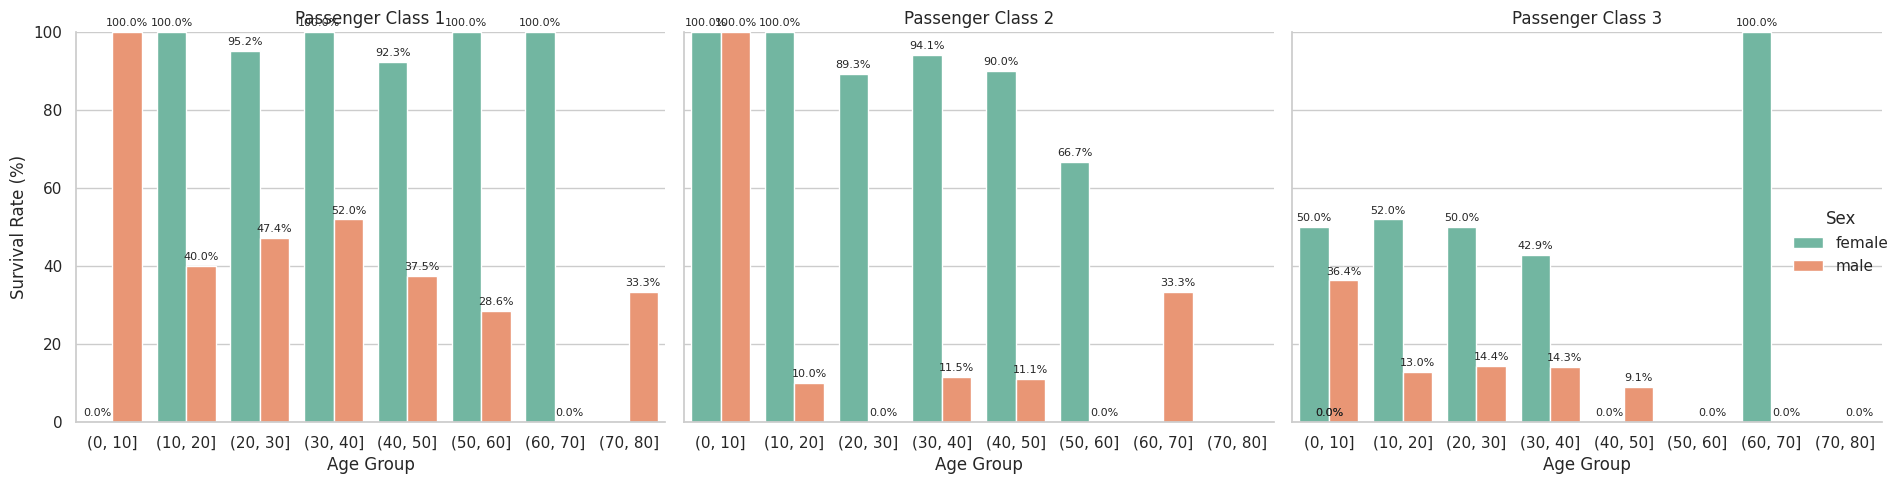

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Calculate survival percentage by Pclass, AgeGroup, and Sex
survival_rate = (
    df.groupby(['Pclass', 'AgeGroup', 'Sex'])['Survived']
      .mean()
      .reset_index()
)
survival_rate['Survived'] = survival_rate['Survived'] * 100  # convert to %

# Plot: grouped bar chart with facets by Passenger Class
g = sns.catplot(
    data=survival_rate,
    x='AgeGroup', y='Survived',
    hue='Sex',
    col='Pclass',          # separate plots for each class
    kind='bar',
    palette='Set2',
    height=5, aspect=1.2
)

# Add titles and labels
g.set_axis_labels("Age Group", "Survival Rate (%)")
g.set_titles("Passenger Class {col_name}")
g.set(ylim=(0, 100))

# Add percentage labels on bars
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2.,
            height + 1,
            f'{height:.1f}%',
            ha='center', va='bottom', fontsize=8
        )

plt.tight_layout()
plt.show()


/tmp/ipython-input-3641888761.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='pastel')


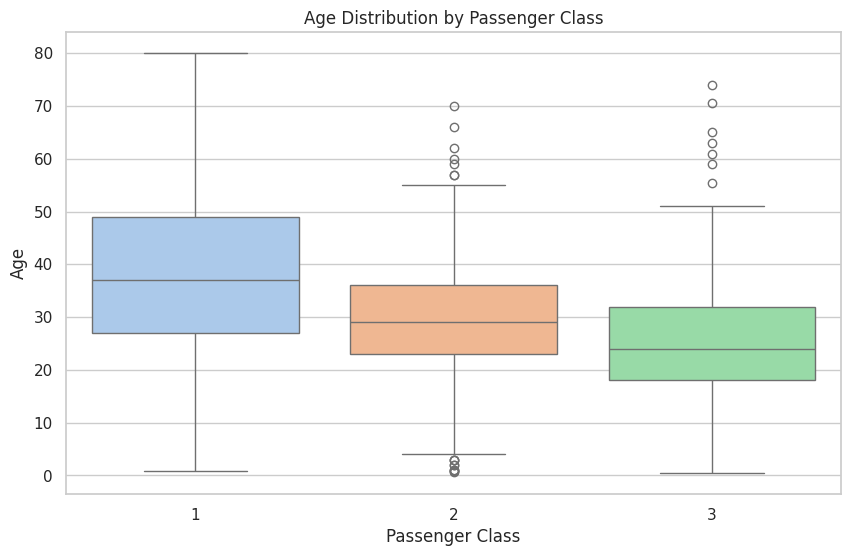

In [ ]:


#Graph Age vs. Passenger Class
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='pastel')

#add label and titles
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

#Print it
plt.show()

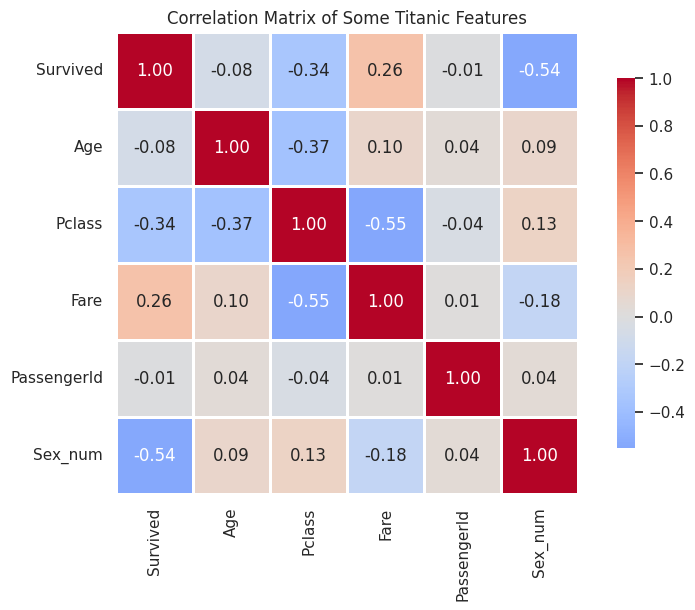

In [ ]:
#Ensure Sex is numeric (female=0, male=1)
df = df.copy()
df['Sex_num'] = df['Sex'].map({'female': 0, 'male':1})


                  # Correlation heatmap
numerical_cols = ['Survived', 'Age', 'Pclass', 'Fare', 'PassengerId', 'Sex_num']
corr_matrix = df[numerical_cols].corr()  # correlation between columns


plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=1,
    fmt='.2f',
    cbar_kws={'shrink': .8}
)

plt.title('Correlation Matrix of Some Titanic Features')
plt.show()

### Interpretation of Your Visualizations

**Instructions:**

Based on the two plots you created above, answer the following questions in this markdown cell.

1.  **What did you plot?** (Briefly describe your two visualizations).

2.  **What story do your plots tell?** (What initial insights or patterns did you discover? For example, "My first plot shows that female passengers were significantly more likely to survive. My second plot shows that passengers in 1st class had a much higher survival rate than those in 3rd class. I got to see lots of different variables. And get more practice.

3.  **What is one hypothesis you can form based on your EDA?** (e.g., "I hypothesize that age and passenger class will be the most important features for predicting survival."

**--- ENTER YOUR ANSWERS BELOW ---**
1.  I ultimately plotted survival by gender and passenger class in the first visualization - it has a pink and blue background! In the second plot, I went for a correlation matrix, ultimately, to compare age and class, among other variables to plot the correlation of what I expected and added other variables to see if something else stood out to me.

2.  The data tells me that a woman had a higher probability of surving than a man, and a higher probability of surviving, as a woman, if she were in first or second class. Third class women did not have good survival probabilities for women but did actually survive at a rate than all classes of men.

3.  Wpmen and children in first or second class had higher survival rates.

Younger children, ages 0-10 survived at higher rates older children, 10-20.  There are more children in third class bringing the average age lower. Women and children first clearly is evident in the survivor data.  

Survival by sex is clearly negatively correlated and men did not survive as well as women.  Additionally, passengers in higher first class had a better chance of sruvival while those in the lower third class were less likely to survive. The -.34 isn't super strong but strong enough to show that passenger class matters.

## Part 3: Data Preparation & Feature Engineering (15 Points)

Raw data is messy. We need to clean it up before feeding it to our models.

**Your Task:**
1.  **Handle Missing Values:**
I've provided code to check for missing values. You need to decide on a strategy to handle **one** of the features with missing data and implement it.

2.  **Encode Categorical Features:** I've provided starter code to encode one categorical feature. You need to encode **one more** categorical feature of your choice.

3.  **Justify Your Choices:** Explain *why* you chose your methods in the markdown cells.

In [ ]:
# Check for missing values
print("--- Missing Values Before ---")
print(df.isnull().sum())
# --- ENTER YOUR CODE HERE for Missing Values ---
#Fill missing Age values with median value because Age is less sensitive to outliers than the mean
df['Age'].fillna(df['Age'].median(), inplace=True)

# Choose ONE feature with missing values and handle it.
# Tip: For 'age', filling with the median is a good start. For 'embarked', filling with the mode is a good start.
# df['Age'].fillna(df['Age'].median(), inplace=True)
# --- END OF YOUR CODE ---
print("--- Missing Values After ---")
print(df.isnull().sum())

--- Missing Values Before ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
Sex_num          0
dtype: int64
--- Missing Values After ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
Sex_num          0
dtype: int64


/tmp/ipython-input-205415999.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Justification for Handling Missing Values:****

Instructions:

** Explain the choice you made above.

1.  **Which feature did you choose?**

2.  **What method did you use to handle the missing values (e.g., fill with median, mode, or drop)?**

3.  **Why was this an appropriate method for this feature?**

**--- ENTER YOUR ANSWERS BELOW ---**

1.  Age.

2.  median

3.  I chose median because median is not as sensitive to outliers/extreme values like mean would be and is less likely to be skewed by extreme values.

In [ ]:
# --- Starter Code for Encoding ---
# For the Titanic dataset, we encode 'Sex'.
#For Heart Disease, we'll use 'sex' as well.
if 'sex' in df.columns:
  df['sex_encoded'] = df['sex'].map({1: 'male', 0: 'female'}).map({'female': 0, 'male': 1})
elif 'Sex' in df.columns:
  df['sex_encoded'] = df['Sex'].map({'female': 0, 'male': 1})

  print("--- Encoding Example: Sex ---")

print(df[['sex' if 'sex' in df.columns else 'Sex', 'sex_encoded']].head())
# --- ENTER YOUR CODE HERE for Categorical Encoding ---
# Choose ONE more categorical feature and encode it.
# Tip: For a feature with 2 categories, .map() is great.
# For a feature with 3+ categories, pd.get_dummies() is a good choice.

# Example for Titanic:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# --- END OF YOUR CODE ---
print("--- Dataframe after your encoding ---")
print(df.head())

--- Encoding Example: Sex ---
      Sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1
--- Dataframe after your encoding ---
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin  AgeGroup  Sex_num  sex_encoded  Embarked_Q  Embarked_S
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN  (20, 30]        1            1       False        True
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85  (30, 40]        0            0       False       False
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN  (20, 30]        0            0       False   

/tmp/ipython-input-2927154979.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


**Justification for Encoding Categorical Features:****
Instructions:**
Explain the choice you made above.
1.  **Which feature did you choose to encode?**
2.  **What encoding method did you use (e.g., map, pd.get_dummies)?**
3.  **Why was this the right method? If you used `get_dummies`, why is `drop_first=True` often a good idea?**

**---ENTER YOUR ANSWERS BELOW ---**
1.  Embarked
2.  I used pd.get_dummies() to perform one-hot encoding. (This is a handy code I need to commit to memory until I become more proficient in python/pandas/scikit/etd and can work with more "difficult" data that might have thousands of values in a column.
3.  Embarked has different ports of embarkation of passengers that seems random.  One-hot encoding will treat each embarkation port individually and does not assume there is a relationship between the ports.  I used get dummies to help the model avoid multicollinearity where the variables are highly correlated.  As I go through this again, I am seeing things differently and am now realizing the lack of experience I have and the need to practice more to the point where I don't have to look anything up.  

## Part 4 & 5: Modeling and Evaluation (40 Points)

Now for the main event! Let's train some models and see how well they can predict outcomes.

**Your Task:**

1.  **Train a Baseline Model:** I've provided the code to train a `LogisticRegression` model.

2.  **Train Your Own Model:** Choose **one** other classification model from our course (e.g., `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`) and train it on the same data.

3.  **Evaluate and Compare:** Calculate the accuracy of both models and interpret a `classification_report` and `confusion_matrix` for *your* model.

4.  **Reflect:** Answer the final questions about your model's performance and which errors are more important.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- Define Features (X) and Target (y) ---
# This is a sample feature set. You may need to adjust it based on the columns you created/dropped!

# Make a copy of the original dataframe
df_model = df.copy()

# Make sure all columns are numeric and have no missing values.
df_model = df_model.select_dtypes(include=np.number).dropna()

# Drop non-numeric or irrelevant columns before defining features

if 'PassengerId' in df_model.columns:
  df_model = df_model.drop(columns=['PassengerId'])

# Define target variable name based on dataset
target_col = 'Survived' if 'Survived' in df_model.columns else 'target'
X = df_model.drop(target_col, axis=1)
y = df_model[target_col]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Print data
print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")
print(f"Features: {X.columns.tolist()}")

Training set has 712 samples.
Test set has 179 samples.
Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_num', 'sex_encoded']


### Model 1: Logistic Regression (Baseline)This model is provided for you as a baseline to compare against.

In [ ]:
# Train the baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

#Print it
print(f"Baseline Model (Logistic Regression) Test Accuracy: {acc_log_reg:.2%}")

Baseline Model (Logistic Regression) Test Accuracy: 81.01%


### Model 2: Your Chosen Model

**Instructions:**

Choose a different classification model, import it, train it, and evaluate its accuracy.

In [ ]:
# --- ENTER YOUR CODE HERE ---#

#1. Import your chosen model class#
from sklearn.ensemble import RandomForestClassifier

# 2. Create an instance of your model#
my_model = RandomForestClassifier(random_state=42)

# 3. Train your model on the training data#
my_model.fit(X_train, y_train)

# 4. Make predictions on the test data#
y_pred_my_model = my_model.predict(X_test)

# 5. Calculate the accuracy of your model#
acc_my_model = accuracy_score(y_test, y_pred_my_model)# print(f"Your Model (...) Test Accuracy: {acc_my_model:.2%}")


print(f"Your Model(Random Forest) Test Accuracy: {acc_my_model:.2%}")

# --- END OF YOUR CODE ---

Your Model(Random Forest) Test Accuracy: 80.45%


In [ ]:
print(f"Logistic Regression Accuracy: {acc_log_reg:.4%}")
print(f"Random Forest Accuracy: {acc_my_model:.4%}")


Logistic Regression Accuracy: 81.0056%
Random Forest Accuracy: 80.4469%


it looks like both models had the exact same accuracy. This has to be coincidental or due to the dataset itself. Even so, in a more complex dataset, Random Forest is better because it combines multiple decision trees and can capture complex patterns in the data that a linear or a logistic regression model would most likely miss. Even so, any time you use historical data to predict the future, you have to realize that historical data cannot predict the future but it will probably do a good job of predicting what it will do. Using the past data to predict the future has always given me a bit of pain. Having to take the leap of faith that the past can predict the future always leaves out that conditions generally stay the same.

### Evaluation and Reflection

**Instructions:**

Now, let's dig deeper into *your* model's performance. Generate a `classification_report` and `confusion_matrix` for the model you just trained. Then, answer the reflective questions.

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
[[89 16]
 [19 55]]


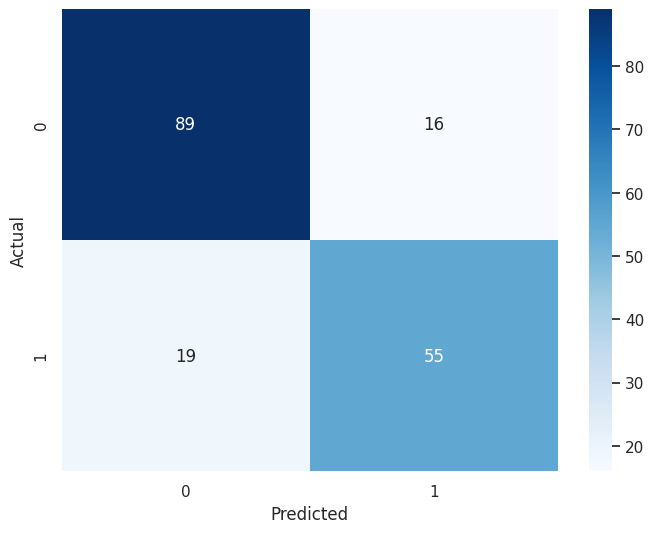

In [ ]:
# --- ENTER YOUR CODE HERE ---

# Generate and print the classification report for your model#
print(classification_report(y_test, y_pred_my_model))

# Generate and print the confusion matrix for your model#
cm = confusion_matrix(y_test, y_pred_my_model)
print("Confusion Matrix:")
print(cm)

# Optional: Visualize the confusion matrix#
plt.figure(figsize=(8, 6))#
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')#
plt.xlabel('Predicted')#
plt.ylabel('Actual')#
plt.show()

# --- END OF YOUR CODE ---

**Reflection Questions:

****Instructions:

** Answer the following questions based on the output from the cell above.

1.  **Which model performed better, the baseline or yours?** Was it a big difference?

2.  **Look at the `classification_report` for your model. What are the precision and recall for the positive class (1)?** (Just state the values).

3.  **Interpret the precision and recall. In the context of your chosen dataset, what do these numbers mean?** (e.g., "A recall of 0.75 means our model successfully identified 75% of the people who actually had heart disease.")

4.  **Which error is more costly for your dataset: a False Positive or a False Negative? Explain your reasoning.**

(There is no single right answer, it depends on your justification).    

*   **Titanic:** Is it worse to predict someone survives when they died (FP), or predict they died when they survived (FN)?    

*   **Heart Disease:** Is it worse to tell a healthy person they have heart disease (FP), or tell a sick person they are healthy (FN)?

**--- ENTER YOUR ANSWERS BELOW ---**
1.  I didn't see any difference in the accuracy so I can't really say  which was better in terms of the accuracy score. I feel like this is a trick questions or I did something wrong. I spent a lot of time trying to fix code and get it into a readable condition. This is really not great for someone that is not strong at all at coding. This really has stressed me out.  At least we went over it in class. And now I am just going through and modifying what I previously submitted.

According to my research, the two models would only have a coincidental chance of having the same prediction accuracy.  The logistial regression model is not as good as the Random Forests simply because Random Forests is far more robust. So, I will chalk it up to the dataset. It has been used in an education forum because it is teaching you to question stuff that might not be as obvious in a larger dataset.  

2.  Precsion is 0.79 and recall is 0.74

3.  A precision of .79 means that when the model predicts someone belongs to class 1 that it was correct 79% of the time.  A recall of 0.74 means that the model was able to correctly identify 74% of true class 1 cases.

4.  False Negative is bad! You are predicting that someone died when they actually survived.  Their family would be crushed until they showed up at home! All that grief and heartache could have done serious damage to their surviving family ie, broken heart syndrome.   A false positive would delay the grief when families find out that their loved one did not in fact survive, giving them false hope.

## Part 6: Conclusion - Tell Your Data Story (15 Points)

This is your final summary. Bring together everything you've learned from your investigation.

**Instructions:**

Write 2-3 paragraphs summarizing your project. Your summary should be a narrative that tells the story of your data. Address the following points:-   

**What was the main goal of your project?**-

My main goal was to understand the code and to try to get better at it. I was tripping over code and it was very time consuming. I hate this. I hate that I am spending time trying to learn the coding instead of being able to have working code and spend more time on analyzing what is happening.  I can't tell you how disappointed I am that everything I am trying to learn is just smashed together in a compressed time frame and I feel like I have missed a whole lot.


The above was my first answer. Now, how I conflated the midterm for the L10 homework is what happens when stress gets the better of me and common sense has taken a vacation.  But, when you are in the stress mode, you make mistakes and clearly, I made a mistake. When I actually did the L10 lab, SO MUCH OF IT NOW made sense. I felt like the lab was so worth doing and I took my sweet time doing it. I spent about an hour per section on it. I really looked at the code and read it and researched what I didn't understand. Now, I feel better about it all, and if I can use AI to help write the code that I don't have committed to memory, that is ok, because I can read it and understand it. I am also a terrible typer so typo errors were killing me. But typing things out long hand was useful to help me recognize the importance of the code and solidify what I was learning. You just have to do some stuff over and over the hard way until it starts to stick and then do some more.  

I finally got some useful instruction on how to do this stuff. I would have liked to have more time and different types of assignments over time, but the course correction requires an accelerated learning schedule. That is life sometimes and ideal learning conditions are a luxury.

**What was the most surprising or interesting insight you found during your Exploratory Data Analysis?**-   The thing that I found surprising was that men, even in first class, died at higher rates than women and children. For some reason, I thought passenger class would have skewed the first class men into surviving more but I was very wrong. They were noble to the end apparently!

For some reason, I had bias in my mind that the first class men got in the boats. Maybe it was from seeing the movie, Titanic, and remembering it that way.  It is useful to challenge your biases with evidence. Sometimes you need to see the data broken out to understand that your belief was just not reality.

**Which features seemed to be the most important for making predictions?**-
sex and age.  Women and children had higher rates of survival. If you then looked at the men, it was passenger class. The third class just didn't stand a chance. As I was getting help with plotting the various charts using AI, because I stopped being a maniac and reread that I could get help from AI, I then "played" a little bit. I started to slice and dice the data in many ways and just make the graphs different colors just for fun.

**How well did your best model perform, and what are its limitations?** My model did pretty good in terms of accuracy but still it missed quite a few class members. I don't really know what is considered to be acceptable for modeling something like that. It would help if I had been given homework that could have let me learn and think about stuff like this but I didn't. So to me, it did ok. but in reality, I would think it should be able to predict at a much higher accuracy.

Ok that was my first answer. After doing the homework, I see that the accuracy was actually pretty good. But one thing that I kept thinking about was if you were a first class passenger, of course you would have a better chance of survival. But the model only predicts who survived and some who survived were "more equal than others". So, the quesiton then becomes do I want to predict who survived very conservatively and be right or do I want to be more aggresive and have low precision but high recall?  

(Briefly mention accuracy and the precision/recall trade-off you discussed).-   

**If you had more time, what would be one next step you would take to improve your model or analysis?


I would definitely use AI to help with all the plotting instead of trying to do it myself and then just focus on the quantitative stats.  I ran myself over trying to do all the code for the charting. When I was reviewing this for a resubmit, I did use AI to help me with the charting and it was glorious. You will see that I started to think of doing things for fun, because I could and not because I should, and a little of the enjoying in learning came back. And when I am learning and doing stuff in a relaxed state, my confidence builds.  Coding is my weakness.  



****--- ENTER YOUR CONCLUSION BELOW ---**...

## 🎉 You've reached the end of the midterm project! 🎉

**Before you submit:**

1.  Go to the `Kernel` menu and select `Restart & Run All`. This will run all your cells from top to bottom.

2.  Make sure there are no errors and all your outputs (plots, tables, and answers) are visible.

3.  Save the notebook file (`.ipynb`).

4.  Submit the file as your midterm.**Great work!**